# Credit Default Prediction: EDA and dataprep

This notebook explores a loan default dataset (`Loan_Default.csv`) with the goal of understanding what drives **loan default**  

The notebook is structured as:

1. Data loading and initial inspection  
2. Data quality checks and missing values  
3. Exploratory Data Analysis (EDA)  
4. Preprocessing and feature engineering  

In [ ]:
# Core libraries
import numpy as np
import pandas as pd

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing and modelling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    RocCurveDisplay
)

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Plot style
plt.style.use("default")
sns.set_theme()


### 1. Data Loading and Initial Inspection
We first load the raw CSV file and take a quick look at its structure:

- Number of rows and columns  
- Column names and data types  
- Example rows  
- Basic summary statistics for numeric variables
- Numerical vs Catgorical coloumns


In [39]:
data_path = "Loan_Default.csv" #Kaggle dataset path

loan_data = pd.read_csv(data_path)

print("Shape of dataset:", loan_data.shape)
print("\nColumns:\n", loan_data.columns.tolist())

Shape of dataset: (148670, 34)

Columns:
 ['ID', 'year', 'loan_limit', 'Gender', 'approv_in_adv', 'loan_type', 'loan_purpose', 'Credit_Worthiness', 'open_credit', 'business_or_commercial', 'loan_amount', 'rate_of_interest', 'Interest_rate_spread', 'Upfront_charges', 'term', 'Neg_ammortization', 'interest_only', 'lump_sum_payment', 'property_value', 'construction_type', 'occupancy_type', 'Secured_by', 'total_units', 'income', 'credit_type', 'Credit_Score', 'co-applicant_credit_type', 'age', 'submission_of_application', 'LTV', 'Region', 'Security_Type', 'Status', 'dtir1']


In [40]:
loan_data.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [41]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

In [42]:
loan_data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,148670.0,NaN,NaN,NaN,99224.5,42917.476598,24890.0,62057.25,99224.5,136391.75,173559.0
year,148670.0,NaN,NaN,NaN,2019.0,0.0,2019.0,2019.0,2019.0,2019.0,2019.0
loan_limit,145326,2,cf,135348,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,148670,4,Male,42346,NaN,NaN,NaN,NaN,NaN,NaN,NaN
approv_in_adv,147762,2,nopre,124621,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan_type,148670,3,type1,113173,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan_purpose,148536,4,p3,55934,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Credit_Worthiness,148670,2,l1,142344,NaN,NaN,NaN,NaN,NaN,NaN,NaN
open_credit,148670,2,nopc,148114,NaN,NaN,NaN,NaN,NaN,NaN,NaN
business_or_commercial,148670,2,nob/c,127908,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 2. Data Quality and Missing Values

Before modelling, we need to understand data quality:

- How many missing values per column?
- Which features are most affected?
- Are there obviously useless columns (e.g. free text IDs)?

We compute both the **absolute** and **percentage** of missing values.

In [43]:
# Absolute and percentage missing values
missing_counts = loan_data.isnull().sum()
missing_percent = (missing_counts / len(loan_data)) * 100

missing_df = (
    pd.concat([missing_counts, missing_percent], axis=1)
    .rename(columns={0: "missing_count", 1: "missing_percent"})
    .sort_values("missing_percent", ascending=False)
)

missing_df[missing_df["missing_count"] > 0]

,missing_count,missing_percent
Upfront_charges,39642,26.664425
Interest_rate_spread,36639,24.644515
rate_of_interest,36439,24.509989
dtir1,24121,16.224524
LTV,15098,10.155378
property_value,15098,10.155378
income,9150,6.154571
loan_limit,3344,2.249277
approv_in_adv,908,0.610749
submission_of_application,200,0.134526


We can decide on a strategy later, but from this table we see:

- Some financial variables (e.g. interest rates, upfront charges, dtir1, LTV) may have substantial missingness.
- Some categorical variables also have small amounts of missing data.

For this baseline notebook, we will use simple imputation (mean for numeric, mode for categorical).

### 3. Feature Types and Basic Counts

Next, we separate columns by type:

- Numeric (integers and floats)
- Categorical (object / string)

This helps define our preprocessing steps and model inputs.

In [44]:
# Identify numeric and categorical columns
numeric_cols = loan_data.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = loan_data.select_dtypes(include=["object"]).columns.tolist()

print("Number of numeric features:", len(numeric_cols))
print("Number of categorical features:", len(categorical_cols))

print("\nNumeric columns:\n", numeric_cols)
print("\nCategorical columns:\n", categorical_cols)

# Quick cardinality check
categorical_cardinality = loan_data[categorical_cols].nunique().sort_values(ascending=False)
display(categorical_cardinality.to_frame("n_unique_categories"))


Number of numeric features: 13
Number of categorical features: 21

Numeric columns:
 ['ID', 'year', 'loan_amount', 'rate_of_interest', 'Interest_rate_spread', 'Upfront_charges', 'term', 'property_value', 'income', 'Credit_Score', 'LTV', 'Status', 'dtir1']

Categorical columns:
 ['loan_limit', 'Gender', 'approv_in_adv', 'loan_type', 'loan_purpose', 'Credit_Worthiness', 'open_credit', 'business_or_commercial', 'Neg_ammortization', 'interest_only', 'lump_sum_payment', 'construction_type', 'occupancy_type', 'Secured_by', 'total_units', 'credit_type', 'co-applicant_credit_type', 'age', 'submission_of_application', 'Region', 'Security_Type']


,n_unique_categories
age,7
Region,4
loan_purpose,4
credit_type,4
total_units,4
Gender,4
occupancy_type,3
loan_type,3
loan_limit,2
submission_of_application,2


### 4. Exploratory Data Analysis (EDA)

We now perform some basic EDA:

- Distribution of the **target** (`Status`)
- Distribution of loans by **gender** and **region**
- Histograms of key numeric features
- Correlation heatmap for numeric variables


Target distribution (counts):


Status
0    112031
1     36639
Name: count, dtype: int64


Target distribution (percentage):


Status
0    75.36
1    24.64
Name: proportion, dtype: float64

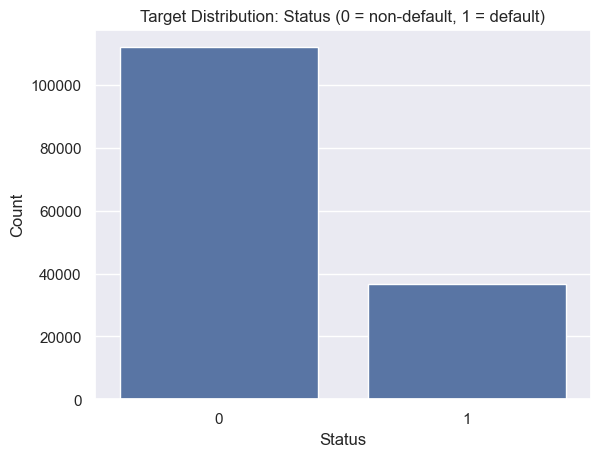

In [45]:
# Assume 'Status' is the target: 0 = non-default, 1 = default
target_counts = loan_data["Status"].value_counts().sort_index()
target_ratio = loan_data["Status"].value_counts(normalize=True).sort_index()

print("Target distribution (counts):")
display(target_counts)
print("\nTarget distribution (percentage):")
display((target_ratio * 100).round(2))

# Plot
fig, ax = plt.subplots()
sns.barplot(x=target_counts.index, y=target_counts.values, ax=ax)
ax.set_title("Target Distribution: Status (0 = non-default, 1 = default)")
ax.set_xlabel("Status")
ax.set_ylabel("Count")
plt.show()


,Gender,Status,count
0,Female,0,20418
1,Female,1,6848
2,Joint,0,33466
3,Joint,1,7933
4,Male,0,31255
5,Male,1,11091
6,Sex Not Available,0,26892
7,Sex Not Available,1,10767


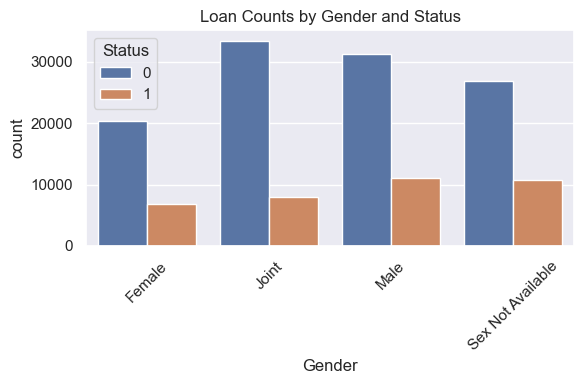

In [46]:
if "Gender" in loan_data.columns:
    gender_status = (
        loan_data.groupby(["Gender", "Status"])
        .size()
        .reset_index(name="count")
    )

    display(gender_status)

    fig, ax = plt.subplots(figsize=(6, 4))
    sns.barplot(
        data=gender_status,
        x="Gender", y="count", hue="Status",
        ax=ax
    )
    ax.set_title("Loan Counts by Gender and Status")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


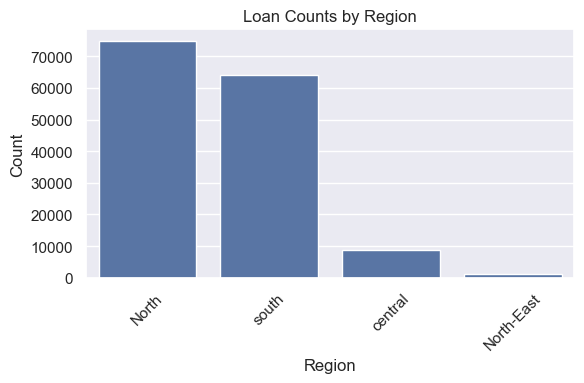

In [47]:
if "Region" in loan_data.columns:
    region_counts = loan_data["Region"].value_counts()

    fig, ax = plt.subplots(figsize=(6, 4))
    sns.barplot(x=region_counts.index, y=region_counts.values, ax=ax)
    ax.set_title("Loan Counts by Region")
    ax.set_xlabel("Region")
    ax.set_ylabel("Count")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


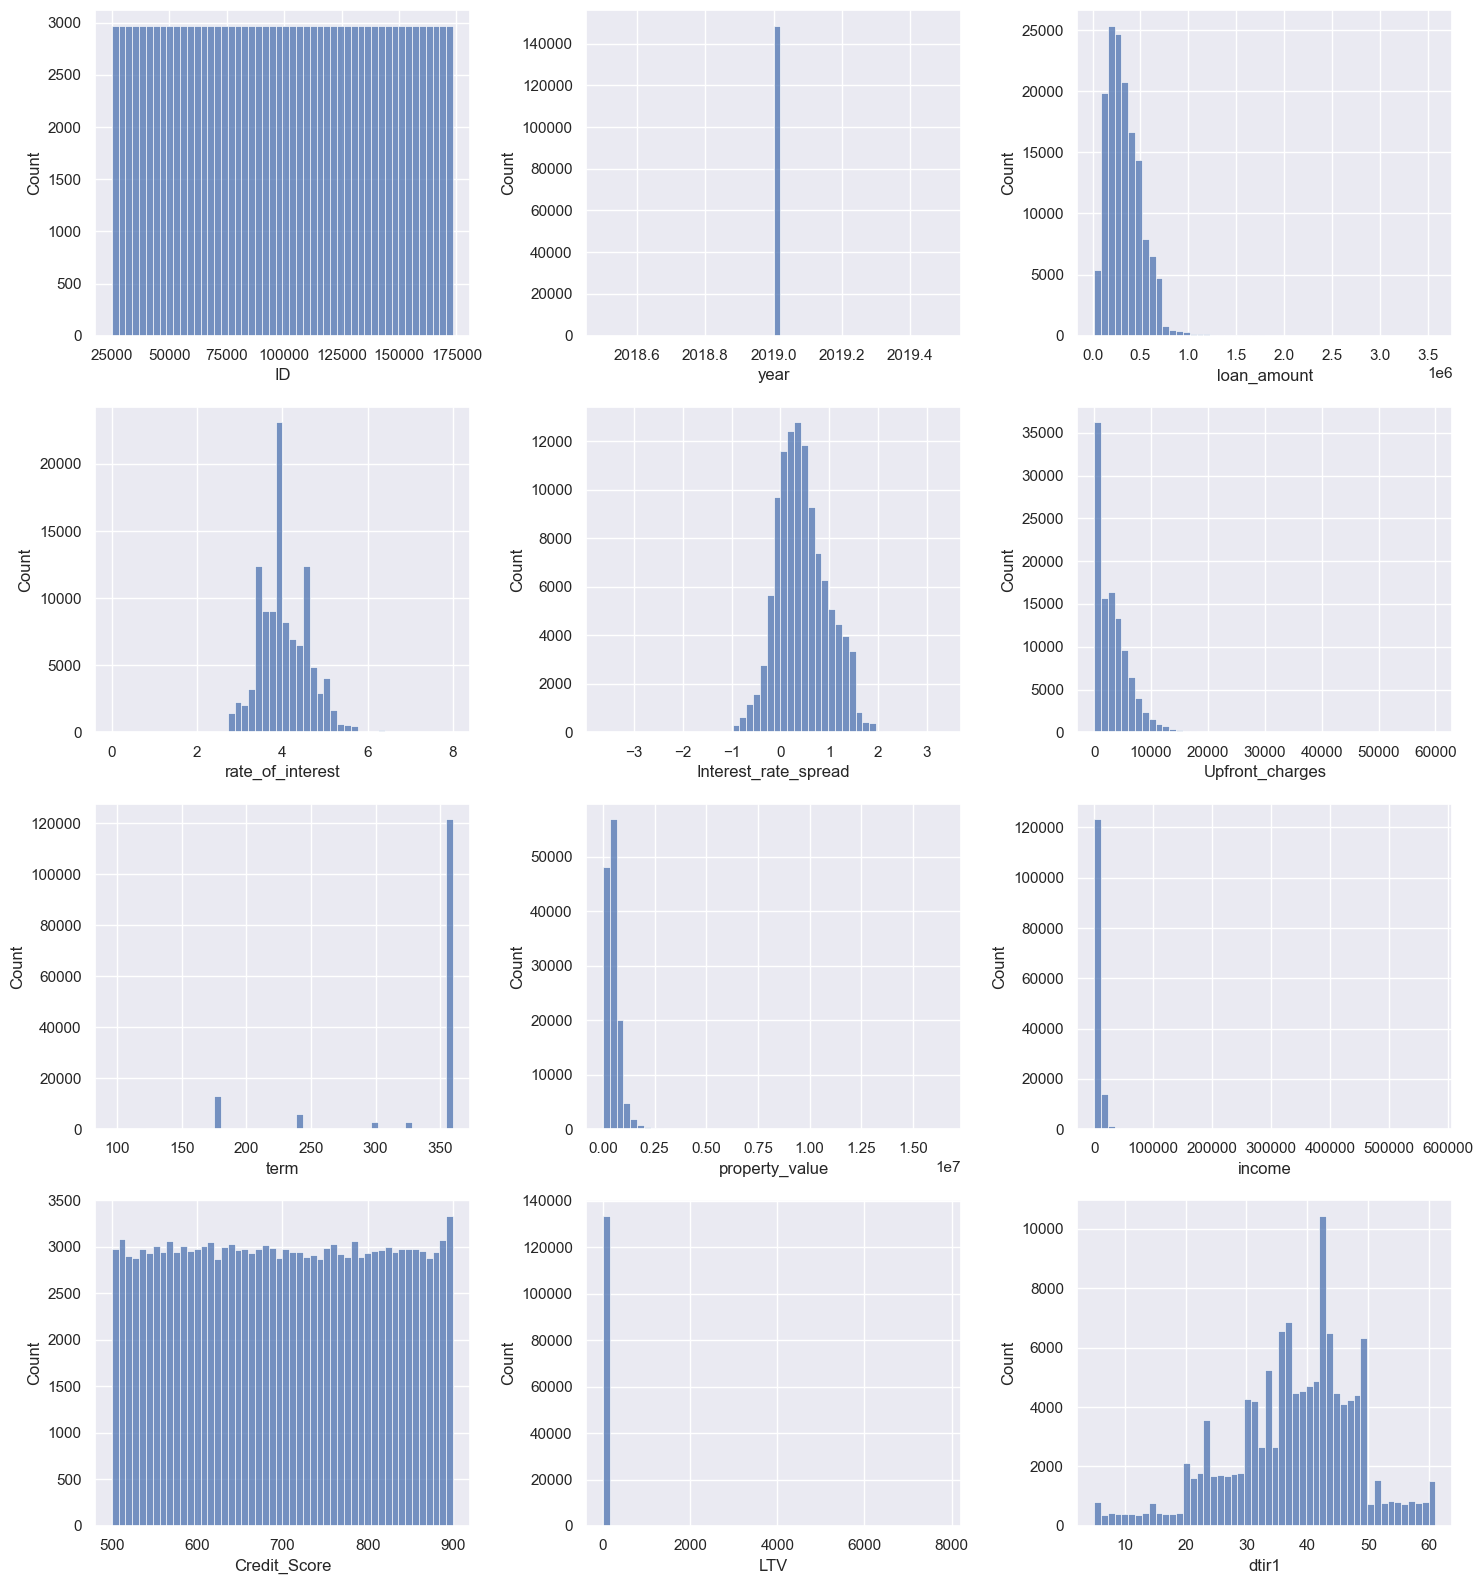

In [48]:
# Plot all numeric variables
numeric_to_plot = [
    col for col in numeric_cols
    if col != "Status"  # exclude target
]

n_cols = 3
n_rows = int(np.ceil(len(numeric_to_plot) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4 * n_rows))
axes = axes.flatten()

for ax, col in zip(axes, numeric_to_plot):
    sns.histplot(loan_data[col].dropna(), bins=50, ax=ax, kde=False)


plt.tight_layout()
plt.show()


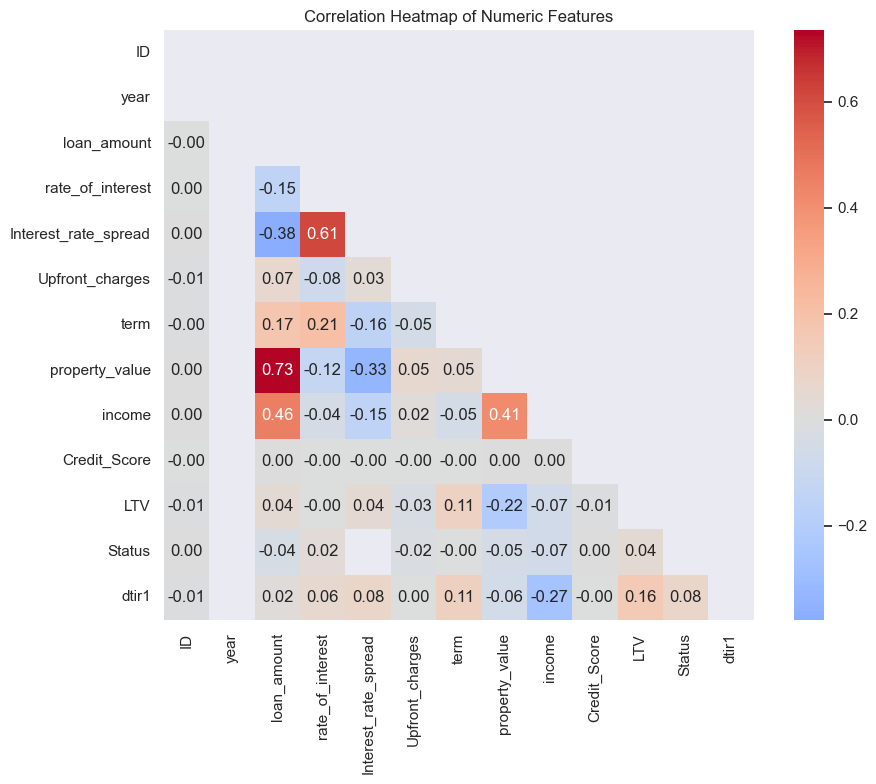

In [49]:
# Correlation among numeric features
corr_matrix = loan_data[numeric_cols].corr()
mask= np.triu(np.ones_like(corr_matrix, dtype=bool)) # remove upper triangle
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    mask=mask,
    annot=True,
    cmap="coolwarm",
    center=0,
    square=True,
    fmt=".2f",
)
plt.title("Correlation Heatmap of Numeric Features")
plt.grid(False)
plt.tight_layout()
plt.show()

### 5. Outlier Handling and Imputation

To avoid extreme values driving our model behaviour, we implement a simple z-score based outlier filter on numeric columns.

Then we:

- Impute numeric missing values with the mean.
- Impute categorical missing values with the mode (most frequent category).

This is intentionally simple and transparent for a baseline model.


In [50]:
#Removing Irrelevant columns
loan_data.drop(['ID',   #Privacy reasons
                'year', #Zero variance
                'term', #low variance
                'Interest_rate_spread', #redundant since its strongly correlated with rate of interest
                'property_value',   # redundant since its strongly correlated with loan amount
                'submission_of_application' # can introduce channel bias
                ],axis=1,inplace=True)

In [51]:


def detect_outliers(data):
    threshold = 3 #+-3sigma
    for i in data.columns:
        if data[i].dtype=='float64' or data[i].dtype=='int64':
            mean = np.mean(data[i])
            std = np.std(data[i])   
            z_scores = [(y - mean) / std for y in data[column]]
            data = data[np.abs(z_scores) <= threshold]
        return data
loan_data = detect_outliers(loan_data)
loan_data



,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,...,income,credit_type,Credit_Score,co-applicant_credit_type,age,LTV,Region,Security_Type,Status,dtir1
0,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,116500,NaN,...,1740.0,EXP,758,CIB,25-34,98.728814,south,direct,1,45.0
1,cf,Male,nopre,type2,p1,l1,nopc,b/c,206500,NaN,...,4980.0,EQUI,552,EXP,55-64,NaN,North,direct,1,NaN
2,cf,Male,pre,type1,p1,l1,nopc,nob/c,406500,4.560,...,9480.0,EXP,834,CIB,35-44,80.019685,south,direct,0,46.0
3,cf,Male,nopre,type1,p4,l1,nopc,nob/c,456500,4.250,...,11880.0,EXP,587,CIB,45-54,69.376900,North,direct,0,42.0
4,cf,Joint,pre,type1,p1,l1,nopc,nob/c,696500,4.000,...,10440.0,CRIF,602,EXP,25-34,91.886544,North,direct,0,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,cf,Sex Not Available,nopre,type1,p3,l1,nopc,nob/c,436500,3.125,...,7860.0,CIB,659,EXP,55-64,71.792763,south,direct,0,48.0
148666,cf,Male,nopre,type1,p1,l1,nopc,nob/c,586500,5.190,...,7140.0,CIB,569,CIB,25-34,74.428934,south,direct,0,15.0
148667,cf,Male,nopre,type1,p4,l1,nopc,nob/c,446500,3.125,...,6900.0,CIB,702,EXP,45-54,61.332418,North,direct,0,49.0
148668,cf,Female,nopre,type1,p4,l1,nopc,nob/c,196500,3.500,...,7140.0,EXP,737,EXP,55-64,70.683453,North,direct,0,29.0


In [52]:

for i in loan_data.columns:       
    if loan_data[i].dtype=='float64' or loan_data[i].dtype=='int64':
        loan_data[i].fillna(loan_data[i].mean(),inplace=True)

    else:
        loan_data[i].fillna(loan_data[i].mode()[0],inplace=True)
        
loan_data.isnull().sum().sum()# Sanity check: no remaining missing values


np.int64(0)

array([[<Axes: title={'center': 'loan_amount'}>,
        <Axes: title={'center': 'rate_of_interest'}>,
        <Axes: title={'center': 'Upfront_charges'}>],
       [<Axes: title={'center': 'income'}>,
        <Axes: title={'center': 'Credit_Score'}>,
        <Axes: title={'center': 'LTV'}>],
       [<Axes: title={'center': 'Status'}>,
        <Axes: title={'center': 'dtir1'}>, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >]], dtype=object)

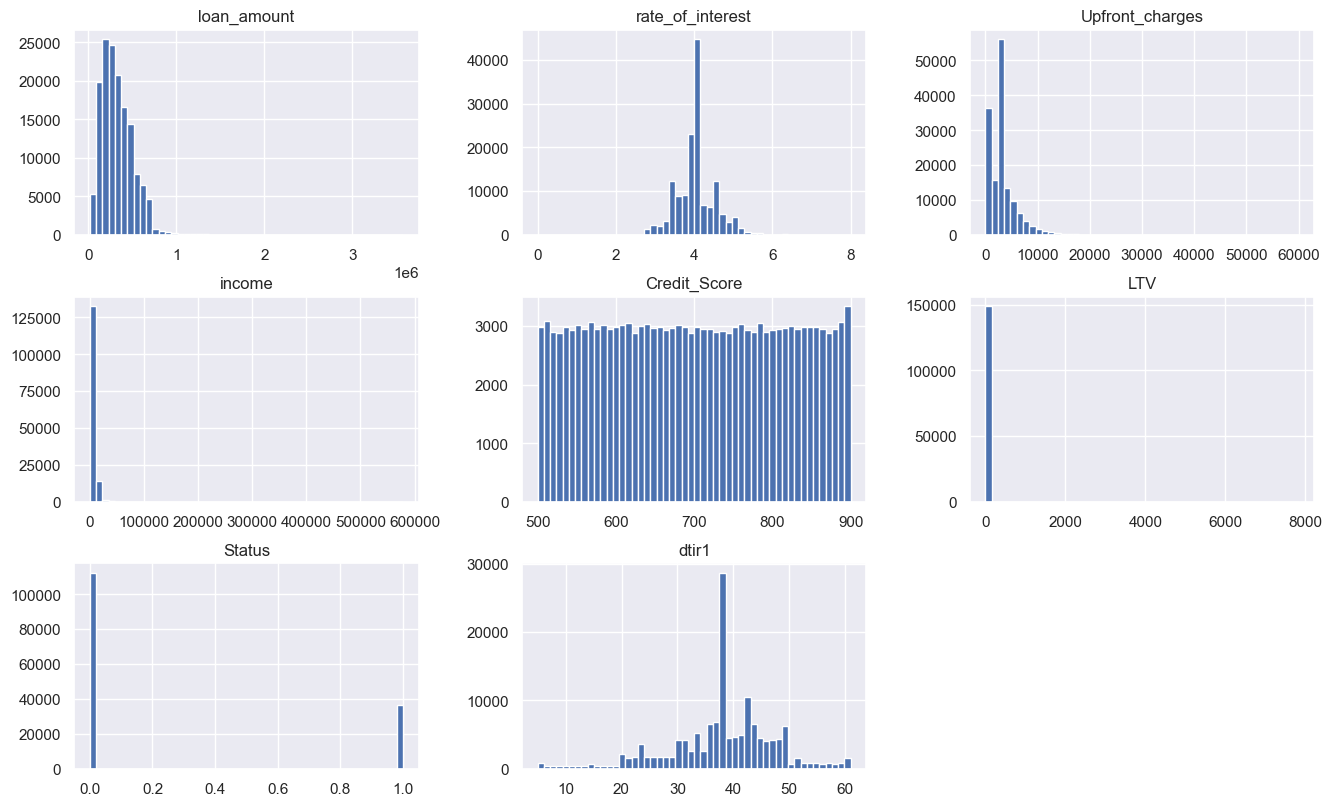

In [53]:
loan_data.hist(figsize=(16, 20), bins=50, layout=(6, 3))


### 6. Encoding Categorical Variables

Most machine learning models in scikit-learn require numeric inputs.

For this baseline exercise, we use **label encoding** on all categorical columns.  
This is fine for tree-based models; for linear models, one-hot encoding is usually better, but we keep things simple here.


In [ ]:

# Encoding Categorical Variables
categorical_cols =loan_data.select_dtypes(include=['object']).columns
# instantiate labelencoder object
le = LabelEncoder()

# apply le on categorical feature columns
loan_data[categorical_cols] = loan_data[categorical_cols].apply(lambda col: le.fit_transform(col))


In [ ]:
loan_data.to_csv('Preprocessed Data.csv')

### 10. Discussion 

In this notebook we:

- Cleaned the dataset and handled missing values with simple imputation.
- Performed basic EDA:
  - Target imbalance and class distribution
  - Distributions of key numeric features
  - Correlations between variables
- Encoded categorical features and saved them into a csv file.